<center> <h1>Día 2</h1> </center>
<center> <h2>Trabajando con una lista de compuestos </h2> </center>

---
<center> <h2>Antes de comenzar</h2> </center>

En la celda que se encuentra a continuación vamos a importar todas las librerías que se van a usar.

❗ Para correr la celda podes apretar el boton "Run" o usar el comando "Ctrl + Enter"

👇

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.Draw import SimilarityMaps

from scipy.cluster.hierarchy import dendrogram, linkage

A lo largo de este día vamos a estar trabajando con los comandos básicos de RDKit para trabajar con una lista de moléculas.

Esta guía está elaborada en base a https://www.rdkit.org/docs/GettingStartedInPython.html

En el caso de que quieras profundizar en algún comando podrás encontrar más información en ese link.

---
<center> <h2>Manos a la obra</h2> </center>

En este práctico vamos a usar como ejemplo una lista de moléculas proveniente de un ensayo realizado en <i>T. cruzi</i>. 

El objetivo de este experimento fue encontrar moléculas que tuvieran actividad tripanocida y asi obtener nuevos candidatos para tratar la enfermedad del Chagas. Se ensayaron ~300.000 compuestos químicos y ~4.000 resultaron activos

Si quieren profundizar, la descripción y el protocolo del ensayo se encuentran en este link: 
https://pubchem.ncbi.nlm.nih.gov/bioassay/1885

---
A continuación vamos a cargar la lista de moléculas activas de ese ensayo:

❗ Para correr la celda podes apretar el boton "Run" o usar el comando "CTRL + Enter"

👇

In [2]:
smiles_tabla = pd.read_csv('smiles_list.csv')

Usando el comando `pd.read_csv()` estamos usando la libreria <i>pandas</i> para abrir un documento de texto de tipo .csv

La libreria <i>pandas</i> es muy útil para trabajar en python, si quieren leer más al respecto pueden ingresar al siguiente link: https://pandas.pydata.org/ 

Veamos que obtuvimos luego de ejecutar el comando:

👇

In [3]:
smiles_tabla

,ID,smiles
0,0,CC1=CC=C(C=C1)C(C2=NN=NN2C(C)(C)C)N(CC3=CC=CO3...
1,1,C1CCN(C1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC3=CC...
2,2,C1CCC(CC1)CNC2=C3CCCCC3=NC4=NN=NN24
3,3,CC1=CC(=C(C=C1N)C(C)C)OC.Cl
4,4,C1CN(CCN1C2=CC=CC=C2)C(C3=CN=CC=C3)C4=NN=NN4CC...
...,...,...
4391,4391,CCCCCCC1=C(C=C(C=C1)O)O
4392,4392,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCN=C(N)N)C(=O)N...
4393,4393,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...
4394,4394,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...


💭 ¿El archivo importado tiene la cantidad de datos esperada?


Al usar este comando estamos generando una variable llamada "smiles_lista". Esta variable es en formato "DataFrame", que es el formato que usa python para representar tablas. 

Para verificarlo podemos pedirle a Python que nos diga de que el tipo de la variable usando la función 

`type()`

👇

In [4]:
type(smiles_tabla)

pandas.core.frame.DataFrame

Dentro de la tabla se encuentran guardadas en las "rows" o filas todas las estructuras de smiles activas del ensayo.

Para acceder a las rows, primero tenemos que indicarle el nombre de la columna (en este caso tenemos sólo una columna, "smiles") y después indicarle el número de fila. Cada una de esas cosas se indican entre corchetes.

Vamos a ver que compuesto se encuentra en la row 3
👇

In [5]:
smiles_tabla['smiles'][3]

'CC1=CC(=C(C=C1N)C(C)C)OC.Cl'

¡Nos indicó el compuesto que está en la row 4!

Esto sucede porque los números de fila comienzan desde el 0

In [6]:
smiles_tabla['smiles'][2]

'C1CCC(CC1)CNC2=C3CCCCC3=NC4=NN=NN24'

Al igual que ayer, todos los compuestos se encuentran en en formato "str" o string. Recuerden que este es el formato que usa python para representar texto.

Para verificarlo podemos pedirle a Python que nos diga de que el tipo de la variable usando la función 

`type()`


👇

In [7]:
type(smiles_tabla['smiles'][2])

str

Lo que buscamos es poder trabajar con la molécula como tal, no como cadena de texto.

Como ayer, vamos a usar <b>RDKit</b> para hacerlo!

Podemos transformar a molécula la correspondiente a la fila 3:

👇

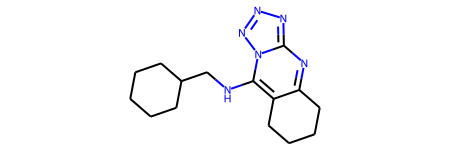

In [8]:
molecula = Chem.MolFromSmiles(smiles_tabla['smiles'][2])
molecula

O podemos usar el siguiente comando para transformar a molécula todas las filas de la tabla

👇

In [9]:
moleculas = [Chem.MolFromSmiles(smiles) for smiles in smiles_tabla['smiles']]

💭 ¿Que obtuvimos luego de ejecutar ese comando?

❗ Escribí la variable que generamos en la celda que se encuentra debajo

👇

In [10]:
moleculas

 ...]

💭 ¿Qué tipo de variable es?

❗ Escribí el comando en la celda que se encuentra debajo

👇

In [11]:
type(moleculas)

list

💡 ¡Es una lista!

Para poder trabajar mejor, vamos a agregar estas moléculas a la tabla inicial usando el siguiente comando:

👇

In [12]:
smiles_tabla['moleculas'] = moleculas

Veamos como quedó ahora la tabla:

👇

In [13]:
smiles_tabla

,ID,smiles,moleculas
0,0,CC1=CC=C(C=C1)C(C2=NN=NN2C(C)(C)C)N(CC3=CC=CO3...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
1,1,C1CCN(C1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC3=CC...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
2,2,C1CCC(CC1)CNC2=C3CCCCC3=NC4=NN=NN24,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
3,3,CC1=CC(=C(C=C1N)C(C)C)OC.Cl,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
4,4,C1CN(CCN1C2=CC=CC=C2)C(C3=CN=CC=C3)C4=NN=NN4CC...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
...,...,...,...
4391,4391,CCCCCCC1=C(C=C(C=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...
4392,4392,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCN=C(N)N)C(=O)N...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...
4393,4393,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...
4394,4394,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...


Veamos como quedó la tabla terminada:

👇

In [14]:
smiles_tabla

,ID,smiles,moleculas
0,0,CC1=CC=C(C=C1)C(C2=NN=NN2C(C)(C)C)N(CC3=CC=CO3...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
1,1,C1CCN(C1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC3=CC...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
2,2,C1CCC(CC1)CNC2=C3CCCCC3=NC4=NN=NN24,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
3,3,CC1=CC(=C(C=C1N)C(C)C)OC.Cl,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
4,4,C1CN(CCN1C2=CC=CC=C2)C(C3=CN=CC=C3)C4=NN=NN4CC...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
...,...,...,...
4391,4391,CCCCCCC1=C(C=C(C=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...
4392,4392,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCN=C(N)N)C(=O)N...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...
4393,4393,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...
4394,4394,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...


Vamos a guardar esta tabla en nuestra carpeta de trabajo para usarla más adelante

In [15]:
smiles_tabla.to_csv('smiles_tabla.csv')

Podemos usar un comando el siguiente comando para dibujar todas las moléculas de la tabla

👇

C:\Users\Mercedes_IIB-UNSAM\anaconda3\envs\my-rdkit-env\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:241: UserWarning: Truncating the list of molecules to be displayed to 200. Change the maxMols value to display more.
  warnings.warn(


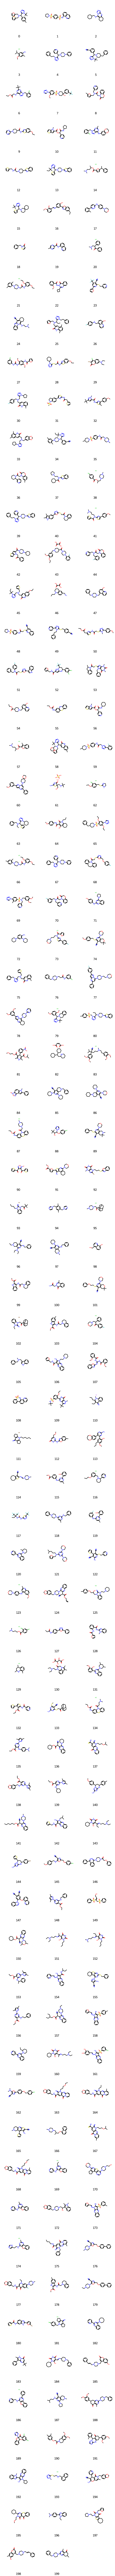

In [16]:
Chem.Draw.MolsToGridImage(smiles_tabla['moleculas'], legends = [(str(smiles_tabla['ID'][i])) for i in range(len(smiles_tabla))],maxMols = 200)

---
<center> <h2>Identificando subestructuras</h2> </center>

Ayer aprendimos a identificar un funcional específico en una molécula, hoy vamos a hacerlo con la tabla de moléculas.

El objetivo de esta sección será seleccionar todas las moléculas que tengan un grupo benceno
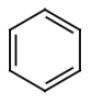

Para hacerlo, tenemos que indicarle a RDKit cual es el smiles del benceno:

In [17]:
benceno = 'C1=CC=CC=C1'

Vamos a usar la función `MolFromSmiles`, porque queremos que RDKit transforme el string que generamos a una molécula.

In [18]:
substructura = Chem.MolFromSmiles(benceno)

Podemos visualizarlo indicando la variable correspondiente a la molécula

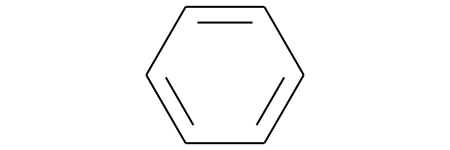

In [19]:
substructura

Ahora vamos a usar el siguiente comando para seleccionar aquellas moléculas de la tabla que tengan un benceno en su estructura química. 

In [20]:
substructuras = [x for x in smiles_tabla['moleculas'] if x.HasSubstructMatch(substructura)]

💭 ¿Que obtuvimos luego de ejecutar ese comando?

❗ Escribí la variable que generamos en la celda que se encuentra debajo

👇

In [21]:
substructuras

 ...]

💭 ¿Qué tipo de variable es?

❗ Escribí el comando en la celda que se encuentra debajo

👇

In [22]:
type(substructuras)

list

Cómo hicimos antes, vamos a transformar esta lista en una tabla.

En este caso, vamos a tener que generar una tabla nueva. Esta tabla va a contener sólo las moléculas seleccionadas

In [23]:
substructuras_tabla = pd.DataFrame(substructuras, columns=['moleculas'])

💭 ¿Que obtuvimos luego de ejecutar ese comando?

❗ Escribí la variable que generamos en la celda que se encuentra debajo

👇

In [24]:
substructuras_tabla

,moleculas
0,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
1,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
2,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
3,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
4,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
...,...
4109,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...
4110,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...
4111,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...
4112,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...


💭 ¿Cuántas moléculas de la tabla inicial tienen un grupo benceno?

Vamos a agregarle los nombres que usamos para identificar a cada molécula usando el siguiente comando

👇

In [25]:
substructuras_tabla = smiles_tabla.merge(substructuras_tabla, left_on='moleculas', right_on='moleculas')

💭 ¿Que obtuvimos luego de ejecutar ese comando?

❗ Escribí la variable que generamos en la celda que se encuentra debajo

👇

In [26]:
substructuras_tabla

,ID,smiles,moleculas
0,0,CC1=CC=C(C=C1)C(C2=NN=NN2C(C)(C)C)N(CC3=CC=CO3...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
1,1,C1CCN(C1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC3=CC...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
2,3,CC1=CC(=C(C=C1N)C(C)C)OC.Cl,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
3,4,C1CN(CCN1C2=CC=CC=C2)C(C3=CN=CC=C3)C4=NN=NN4CC...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
4,5,CC(C)(C)N1C(=NN=N1)C(C2=CC=CC(=C2)C#N)N3CCC(CC...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF7...
...,...,...,...
4109,4387,C1CCN(CC1)C2=C(C=C(C=C2)S(=O)(=O)N3CCCCC3)NC(=...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...
4110,4388,C1CCN(CC1)S(=O)(=O)C2=CC(=C(C=C2)N3CCOCC3)C(=O...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...
4111,4389,C1=CC(=CC=C1N/C(=N/C(=NCCCCCCN=C(/N=C(/NC2=CC=...,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...
4112,4390,CC(C)NC1=CC=C(C=C1)NC2=CC=CC=C2,<rdkit.Chem.rdchem.Mol object at 0x0000018DFF8...


Podemos usar un comando el siguiente comando para dibujar todas las moléculas de la nueva tabla

👇

C:\Users\Mercedes_IIB-UNSAM\anaconda3\envs\my-rdkit-env\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:241: UserWarning: Truncating the list of molecules to be displayed to 200. Change the maxMols value to display more.
  warnings.warn(


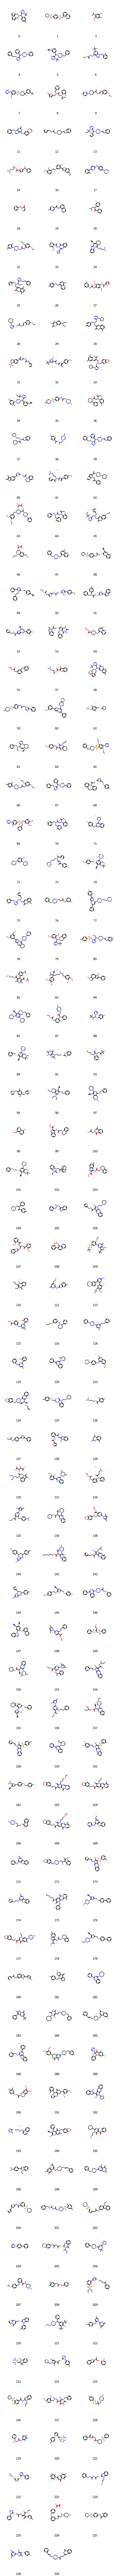

In [27]:
Chem.Draw.MolsToGridImage(substructuras_tabla['moleculas'], legends = [(str(substructuras_tabla['ID'][i])) for i in range(len(substructuras_tabla))],maxMols = 200)

💭 ¿Lo que observas en la celda anterior corresponde con lo que esperabas ver?

💭 ¿Todos los compuestos tienen al menos un grupo benceno?

---
<center> <h2>Actividad</h2> </center>

<center> <h3>¡Ahora te toca hacer el análisis a vos!</h3> </center>

Te toca armar tu propio código para seleccionar compuestos que tengan el siguiente grupo funcional:

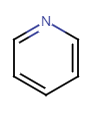

❗ Seguí los siguientes pasos:

1) Busca el smiles de la subestructura (💡 Pista: Podés hacerlo en https://marvinjs-demo.chemaxon.com/latest/ )
2) Generá la molécula de la subestructura usando RDKit
3) Verifica que la subestructura se generó correctamente
4) Arma una tabla nueva que contenga todos los compuestos con la subestructura
5) Dibujá todas las moléculas de la nueva tabla
6) Verificá que la nueva tabla se generó correctamente
7) Guardá la tabla en un archivo .csv

❗ Escribí los comandos en la celda que se encuentra debajo o agregá la cantidad de celdas que consideres necesarias.

👇